# Convolutional Neural Network(CNN)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import pathlib
from pathlib import Path
import os

In [2]:
path = str(Path(pathlib.Path().absolute()).parents[0])
path += "/ConvolutionalNeuralNetwork(CNN)/data"
path

'/Users/macbookpro/Desktop/machine_learning/courses/deeplearning/ConvolutionalNeuralNetwork(CNN)/data'

In [3]:
train = pd.read_csv(os.path.join(path,'train.csv'))
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test= pd.read_csv(os.path.join(path,'test.csv'))
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
Y_train= train["label"]
X_train = train.drop(labels=["label"],axis=1)

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

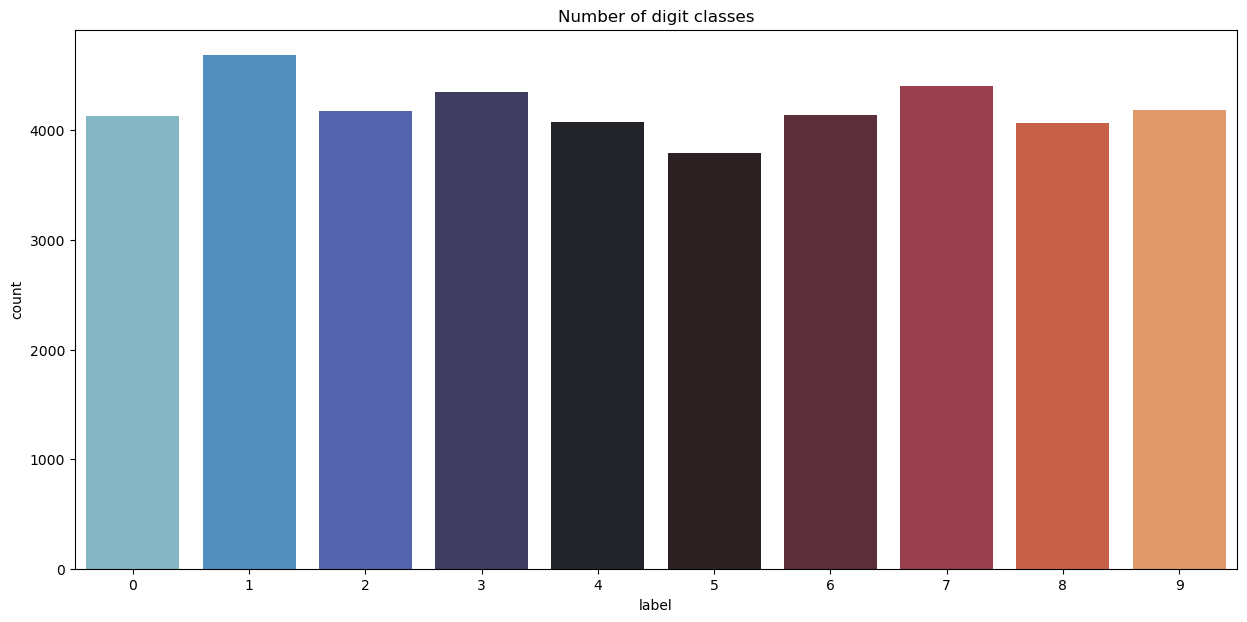

In [6]:
plt.figure(figsize=(15,7))
sns.countplot(Y_train,palette="icefire")
plt.title("Number of digit classes")
Y_train.value_counts()

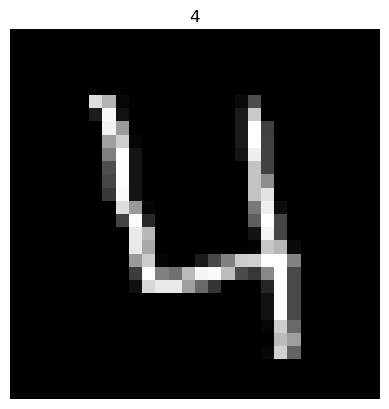

In [7]:
#rastgele bir örnegin cizimi
img = X_train.iloc[3].to_numpy() #ucuncu indexteki pikselleri alıp bir matrix haline getirildi.
img = img.reshape((28,28)) # matrix 28'e 28 yapıldı.
plt.imshow(img,cmap='gray') # gosterilecek resim gray scale yapildi
plt.title(train.iloc[3,0])
plt.axis("off")
plt.show()

- **Normalization**
- Normalization uygulamazasak farkli renklerden kaynakli hatalar alabiliriz.
- Normalization verileri 0 ve 1 arasina koyar yani bu demektir ki gray scale olur. 
- Normalization uygulandiginda CNN daha hizli calisir.
---
- **Resahpe**
- Train ve test image'lerin 28x28 yapmamiz gerekir yoksa keras anlamaz.
- 28x28x1 gray scale oldugunu gosterir.
- 28x28x3 ise renkli yani RGB kanalini gosterir. 
---
- **Label Encoding**
- 2 => [0,0,1,0,0,0,0,0,0]
- 4 => [0,0,0,0,1,0,0,0,0]

### Normalization 

In [8]:
X_train = X_train /255.0
test = test / 255.0
print("x train shape: ", X_train.shape)
print("test shape: ", test.shape)

x train shape:  (42000, 784)
test shape:  (28000, 784)


### Reshape

In [10]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print("x train shape: ", X_train.shape)
print("test shape: ",test.shape)

x train shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


### Label Encoding

In [11]:
from keras.utils.np_utils import to_categorical # one-hot-encoding
Y_train = to_categorical(Y_train, num_classes = 10)

2023-03-13 01:40:50.149971: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Train Test Split

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_test shape (4200, 10)


- **Yarisma verisi oldugu icin gercek hayat verilerinde aslinda train datami train ve validation olmak üzere ikiye boluyorum. Train ile modelimi olusturacagim, validation degeriyle modelimi test edecegim. Daha sonra test verisiyle gercek hayattaymis gibi modelin testini yapacagim.** 

 - **CNN**
 - Image classification olarak kullanılır.

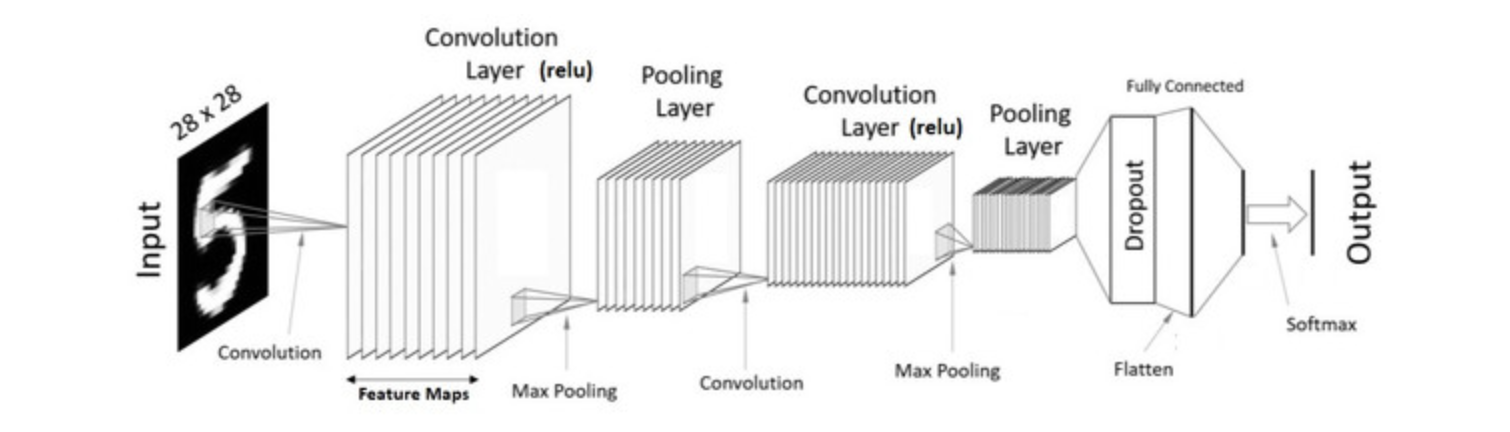

In [13]:
from IPython.display import Image
Image(filename='cnn.png') 

- Bir resime uyguladigimizda belli basli seyleri ayirt eden seye filtre denir. 
- Convolutiona Layer filtre kismidir. Bir fotografa tutunca kedi mi kopek mi oldugunu ayirt edecek kisimdir. 
- Feature Maps'ler kedinin kulagi mi kuyrugu mu ayirt eden kisimdir. 
- Pooling Layer bir kulagin tek bir sayiyla temsil edilmesini saglayan kisimdir. Kulagi butun olarak matrixte tutmuyorum da orta noktasi veya max sayisini tutuyorum. Burasi bana hiz sagliyor. Ve overfitting durumunu engelliyor. 
- Sonra tekrar convolution yapiliyor. Ne kadar cok bu katmandan varsa o kadar iyi sonuc alabiliriz.  
- Sonra tekrar pooling yapiliyor.
- Flatten ise matrisi uzatiyordu boylelikle duzlestirme islemi yapiliyor. 

- feature detector: featurlari bulmama yarayan araçlardır. Kernel ve filtre olarak adlandirabilir. Karmasik sekilleri,basit sekilleri ve kenarlari filtrelememe ve tespit etmeme yarar (edge ve convex shape). 
- feature map: convol edilmis featurelara denir. Yani filtreyi uyguladigimizda carpip toplama islemi yaptigimda bu sayi convol featuredır.
- Stride: filtremi uygularken kullandigim atlama sayisi.
- Bu filtre islemleri ile imagein sizeini azaltmis oluyoruz. 
- Bir fotografta birden fazla filtre uygulanabilir her biri baski bir seyi tespit edebilir. Birden fazla filtre kullaninca birden fazla feature map ortaya cikiyor. Ornegin edge detection filtresi gibi filtreler resimlerde kullanilabilir. 

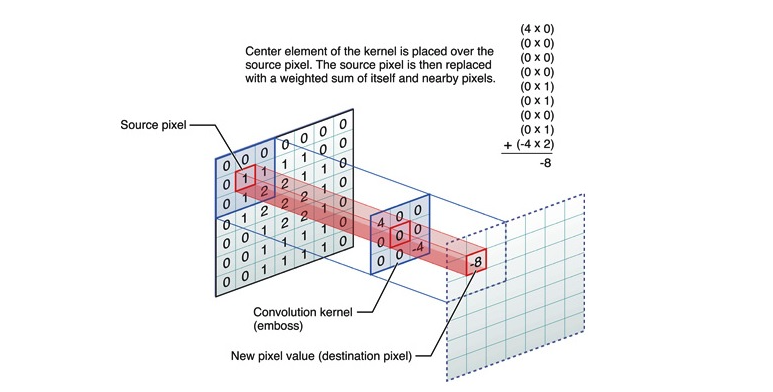

In [14]:
Image(filename='f.png') 

- ReLU bir activation functiondur ve nonlinearityi arttirir yani karmasikligi arttırır. Resimlerde karmasik yapilar oldugu icin RELU kullanmak nonlinearityi attiriyor. 
- RELUya giren input 0dan kucukse sonucu 0 olur, 0 dan buyuk oldugu durumda ise ne girerse o cikar. 

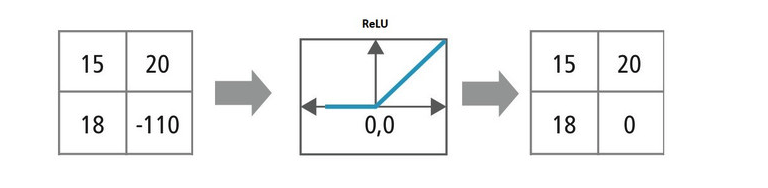

In [15]:
Image(filename='r.png') 

### Same Padding
- Convolution islemi yaptiktan sonra yeni olusan featureun size'ı orjinal imageden kucuk oluyor. Yani bu durumda veri kaybetmis oluyoruz. 
- Yapilan padding yontemleriyle bu kaybin onune gecilir, boyutlar ayni kalir. 
- Bunu yapmak icin resmin kenarlarina 0lar konur. Daha sonra stride bir olarak sekilde elimdeki filtreyi matrixte dolastiriyorum. Boylelikle daha az bilgi kaybetmis olacagiz. 

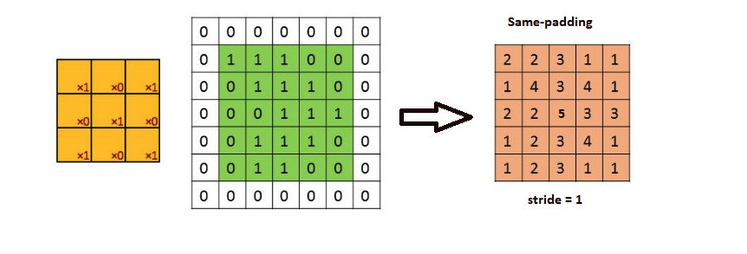

In [16]:
Image(filename='sp.png') 

### Max Pooling
- Size buyuk olursa yavas calisir, bu yuzden down-sampling yapilir. 
- Karenin/poolun/havuzun icindeki minumum degerin ya da maksimum degerin korunmasini saglar. 
- Convolution sonucunda olusan feature map'in, max pooling bu sekilde uygulanip pooling layeri elde ederiz.  

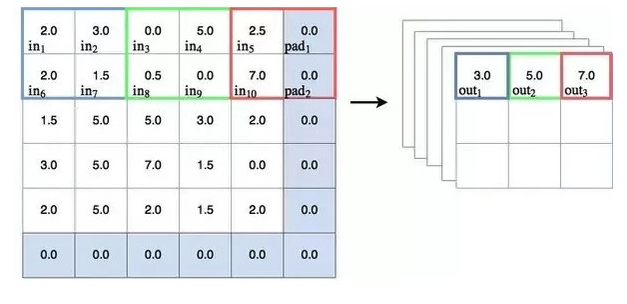

In [17]:
Image(filename='p.png') 

### Flatten
- Flatten'la olusturulanlar benim full connection katmanima input olacak.

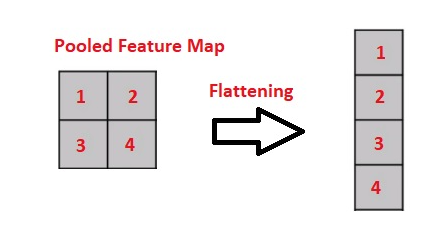

In [18]:
Image(filename='fl.png') 

### Full Connection
- Full connection benim softmax yani classification yaptigimiz sigmoid fonksiyonu iceren artificial neural network kismidir. 
- Tum nodelar birbirine bagli oldugu icin full connection denir. 
- Flattendan gelecek olanlar inputlari alip hidden layerlardan sonra output layera girer ve sonuc cikar. 

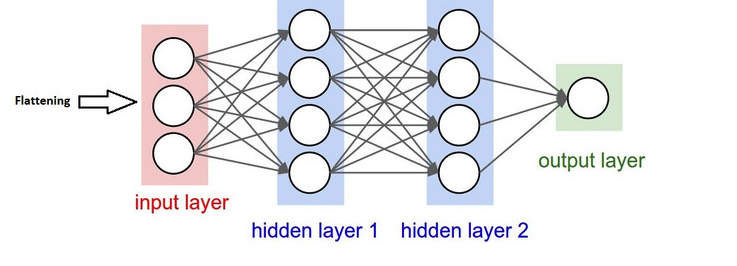

In [19]:
Image(filename='fc.png') 

### CNN implementing with Keras

#### Create Model

conv => max pool => dropout => conv => max pool => dropout => fully connected (2 layer) olarak modelimizi belirledik.

Dropout: Forward propagation yaparak random olarak sectigim noronları kapatiyorum, noronlari devre disi birakiyorum, boylelikle diger noronlarla arasinda baglanti kalmiyor. Random bi treshold belirlenir mesela 5 eger besin ustundeyse noronu kapat degilse kapatma diyoruz. Ezberlemeyi(overfitting) engeller, cesitliligi arttirmak icin onemli bir method. 

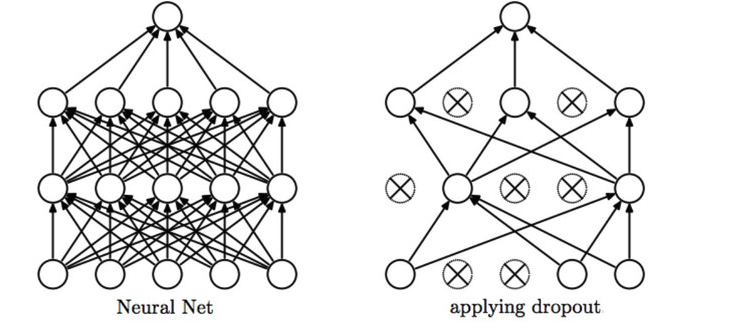

In [20]:
Image(filename='do.png') 

In [21]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential() 
#
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

2023-03-13 01:41:07.615199: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


- `model = Sequential()` burada sequential icerisinde layerlarimi barindiran bir yapidir. Bu yapinin icine layerlarimi ekliyorum ve buna model diyorum. 
- ` model.add(Conv2D(filters = 8,` Birinci olarak convolution ekliyoruz 8 adet filtre kullaniyoruz bunlar feature detect ediyor, hizli olsun diye az olsun istedik. Accuracyi yuksek cikartmaktan cok hizli olmayi amaclayan bir rakam oldu. `kernel_size = (5,5)` filtre size'ı. Yani 8 tane filtrem var 5x5'lik, `padding = 'Same'` padding olarak same padding kullaniyoruz. `activation ='relu'` activation func olarak relu kullaniyoruz. `input_shape = (28,28,1)))` inputum 28x28 matrisler ama keras 1 koymamizi istiyor bu da gray scale oldugunu ifade ediyor. 
- Simdi sirada max pooling kismi var : `model.add(MaxPool2D(pool_size=(2,2)))` 
-  ` model.add(Dropout(0.25)) ` dropout eklendi treshold ise 0.25 belirlendi.
- Tekrar conv ekleme islemi yapildi fakat input_shape yazmasakta olur, cunku bi oncekinden gelen input_shape'i biliyor. max pool yaparken` strides=(2,2)`  burada stride belirlenmis, poolingi gezdirirken ne kadar atlayacigimi belirtmis oldum. 
- Fully connected yaparken once flatten yapildi, daha sonra bir tane hidden ekliyorum activation funtion'u relu olan. ve bir tane de output layer ekliyorum, bu sefer softmax kullaniyorum activation icin bu fonc. sigmoid'in daha genellesitirilmis halidir, birden fazla class varsa softmax kullaniyorum yani sadece kedi kopek ya da 0 1 olmadigi durumlarda output olarak yuzdesel bir sekilde sonucuma varmis oluyorum ornegin kedi kopek kus siniflandiracak olsaydim sonuc olarak bana %70 kedi, %20kopek %10 kus gibi bir sonuc verecektir. 
- Bu sayede layerlar olusturuldu, modelim olustu yani artik yapim hazir. 

#### Define Optimizer
- learning rate'i degistirerek daha hizli ogrenmemizi sagliyor. 

In [22]:
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

#### Compile Model
- loss function hata coksa weightleri update ediyordu hata minumum noktaya inene kadar. 
- categorical crossentropy kullancagiz bunun binary crossentropy'den farki binary'de classification 2 tane binaryde birden fazla. Birden fazla class varsa categorical crossentropy kullaniyoruz. 

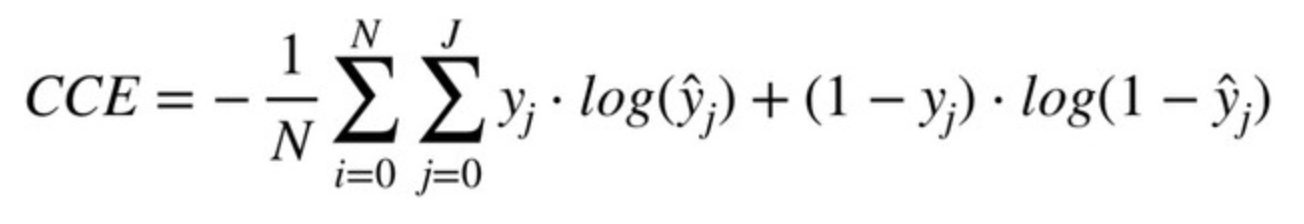

In [23]:
Image(filename='cce.png') 

- Bu formul sonucunda ortaya cikan dogru predict ettiysem hatam 0 yanlis ise hatam yuksek demekti.

In [24]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

- optimizer belirlenir loss function belirlenir, ve metric yani cikan sonucu neye gore degerlendirecegim belirlenir.

#### Epochs and Batch Size
- Biz bir data sete sahibiz bunun 10 tane sample'ı var, 10 adet resim var gibi dusunursek, Batch size 2 olarak belirlendi her seferinde forward back propagation yapilirken bunu 2 resimle yapacaksin ve 2 resimle forward, 2 resimle backward, kaldi 8 yani biz 5 batch yapmis olacagiz. Cunku bizim bir tane batch yapmamiz icin gereken size 2, her bir batch'i 2 kez yapiyorsan 10 tane resmin varsa 5 kez batch yapmis oluruz. 10 resmi 5 kez batch yaptigimda hepsine backward ve forward yapmis oluruz bu da bir epoch olarak adlandirilir, yani her epochta 5 kez batch yapmis oluyoruz. 3 epoch yapmak icin 3x5=15 yani 15 kez batch yapmamiz gerekir. 

In [25]:
epochs = 10  # for better result increase the epochs
batch_size = 250

#### Data Augmentation
- Overfittingi onlemek icin fark boyuttaki farkli datasetlerini datamiza eklememiz lazim, bu yuzden traning datamizda kucuk degisiklikler yapiyoruz sonra bu sayede gercek imageimiza benzeyen imagelar yeniden uretiyoruz. Mesela zoom veya rotasyon degisikligi gibi seyler yapiyoruz. 

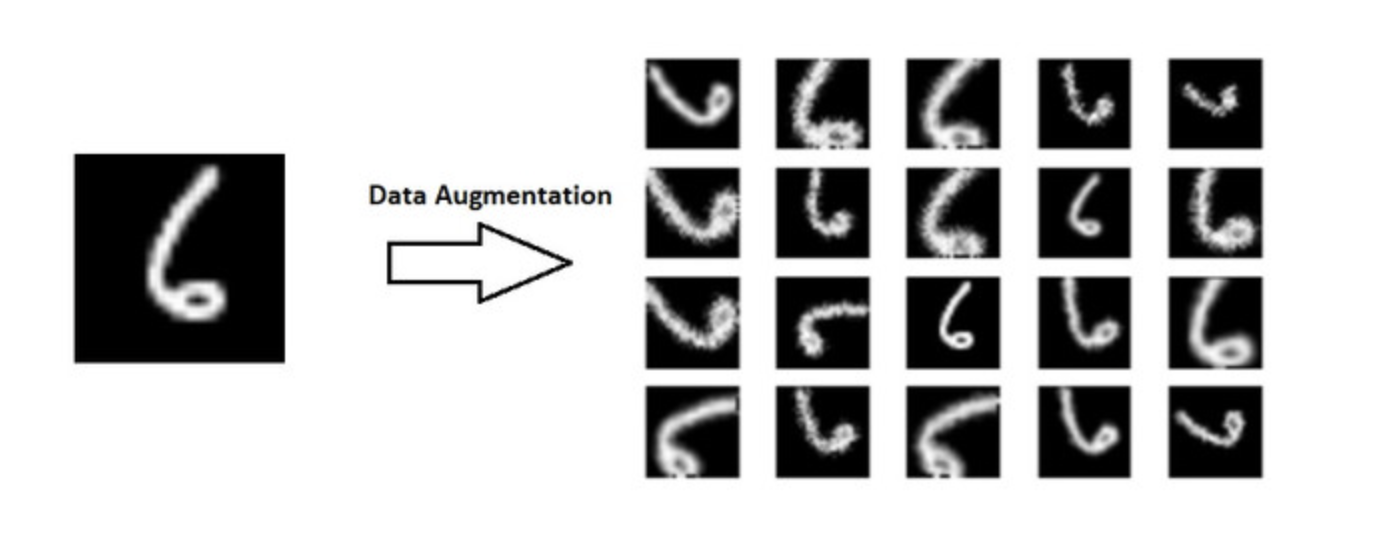

In [26]:
Image(filename='da.png') 

In [27]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # input mean'ı 0'a set ediyor bunu istemiyoruz o yuzden false
        samplewise_center=False,  # her bir sample'ı 0'a set ediyor bunu istemiyoruz false 
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees (rotasyon degistiriyoruz)
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

#### Fit the model
- modelimizi olusturup train ediyoruz.

In [28]:
# Fit the model
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/10
151/151 [==============================] - 15s 92ms/step - loss: 1.1397 - accuracy: 0.6213 - val_loss: 0.2220 - val_accuracy: 0.9374
Epoch 2/10
151/151 [==============================] - 14s 91ms/step - loss: 0.4476 - accuracy: 0.8584 - val_loss: 0.1388 - val_accuracy: 0.9586
Epoch 3/10
151/151 [==============================] - 14s 91ms/step - loss: 0.3254 - accuracy: 0.8999 - val_loss: 0.1103 - val_accuracy: 0.9676
Epoch 4/10
151/151 [==============================] - 13s 88ms/step - loss: 0.2733 - accuracy: 0.9151 - val_loss: 0.0910 - val_accuracy: 0.9710
Epoch 5/10
151/151 [==============================] - 13s 88ms/step - loss: 0.2429 - accuracy: 0.9236 - val_loss: 0.0787 - val_accuracy: 0.9781
Epoch 6/10
151/151 [==============================] - 13s 88ms/step - loss: 0.2190 - accuracy: 0.9317 - val_loss: 0.0752 - val_accuracy: 0.9750
Epoch 7/10
151/151 [==============================] - 14s 92ms/step - loss: 0.1979 - accuracy: 0.9399 - val_loss: 0.0663 - val_accuracy:

#### Eveluate Model

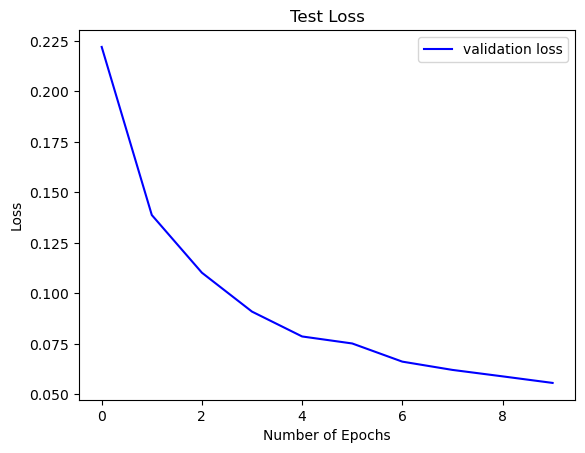

In [31]:
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

132/132 [==============================] - 1s 5ms/step


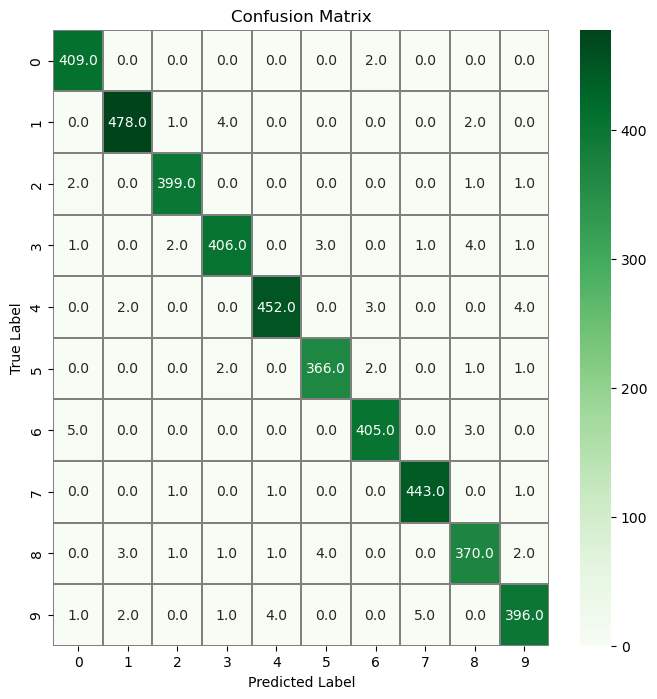

In [32]:
# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()